# Исследовательский анализ тарифов

Заказчик исследования — коммерческий департамент компании «Мегалайн».

**Цель исследования** — Анализ поведения клиентов для определения более прибыльного тарифного плана.

Для этого нужно проверить две гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
2. Средняя выручка пользователией из Москвы отличается от выручки пользователей из других регионов.

Результаты исследования будут учтены при формировании рекламного бюджета.

***Описание тарифов***

*Тариф «Смарт»*
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.  

*Тариф «Ультра»*
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.  

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.

**Ход исследования**

Входные данные от коммерческого департамента:

- информация о пользователях  
- информация о звонках 
- информация о сообщения
- информация об интернет-сессиях
- информация о тарифах


Перед анализом данных и проверкой гипотез понадобится обзор данных для проверки их качества.

Данные будут проверены на ошибки. На этапе предобработки будет рассмотрена возможность исправить самые критичные ошибки данных.Также будут произведены дополнительные расчеты.
 
Таким образом, исследование пройдёт в пять этапов:

 1. Обзор данных.
 2. Предобработка данных.
 3. Дополнительные расчеты.
 4. Анализ даных.
 5. Проверка гипотез.

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
from scipy import stats as st
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [2]:
try: # Локальный путь
    df_users = pd.read_csv('users.csv') 
    df_calls = pd.read_csv('calls.csv')  
    df_messages = pd.read_csv('messages.csv') 
    df_internet =pd.read_csv('internet.csv', index_col=0)
    df_tariffs = pd.read_csv('tariffs.csv') 
except:  
    df_users = pd.read_csv('/datasets/users.csv') 
    df_calls = pd.read_csv('/datasets/calls.csv') 
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
    df_tariffs = pd.read_csv('/datasets/tariffs.csv') 
# 0 знаков после точки для формата float    
pd.options.display.float_format ='{:,.0f}'.format 
# вывод на экран всех столбцов
pd.set_option('display.max_columns', 500)

**Информация о пользователях**

Вывожу на экран первые десять строк таблицы `df_calls`:

In [3]:
df_users.head(10) 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
df_users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Архангельск         1
Name: city, Length: 76, dtype: int64

In [5]:
df_users['user_id'].unique().min()

1000

In [6]:
df_users['user_id'].unique().max()

1499

Получаю общую информацию о таблице:

In [7]:
df_users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице **`df_users`** восемь столбцов. В столбцах два типа данных — `int64` и `object`.

Согласно документации к данным:

`user_id` — уникальный идентификатор пользователя  
`first_name` — имя пользователя  
`last_name` — фамилия пользователя  
`age` — возраст пользователя (годы)  
`reg_date` — дата подключения тарифа (день, месяц, год)  
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
`city` — город проживания пользователя  
`tarif` — название тарифного плана

Названия колонок соответствуют стилю написания названий колонок.   
Количество значений в столбцах совпадает, за исключением столбца `churn_date`. Но есть пояснение, что пропущенное значение означает действие тарифа на момент выгрузки данных. В остальных столбцах пропущенных значений нет.

**Информация о звонках**

Вывожу на экран первые десять строк таблицы `df_calls`:

In [8]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,5,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,18,1000
8,1000_8,2018-09-15,18,1000
9,1000_9,2018-08-15,0,1000


Получаю общую информацию о таблице:

In [9]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице **`df_calls`** четыре столбца. В столбцах три типа данных — `int64`, `float64`, `object`.

Согласно документации к данным:

`id` — уникальный номер звонка  
`call_date` — дата звонка  
`duration` — длительность звонка в минутах  
`user_id` — идентификатор пользователя, сделавшего звонок

Названия колонок соответствуют стилю написания названий колонок. 
Количество значений в столбцах совпадает. Значит, в данных нет пропущенных значений.

**Информация о сообщениях**

Вывожу на экран первые десять строк таблицы `df_messages`:

In [10]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Получаю общую информацию о таблице:

In [11]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Итак, в таблице **`df_messages`** три столбца. В столбцах два типа данных — `int64` и `object`.

Согласно документации к данным:

`id` — уникальный номер сообщения  
`message_date` — дата сообщения  
`user_id` — идентификатор пользователя, отправившего сообщение

Названия колонок соответствуют стилю написания названий колонок. 
Количество значений в столбцах совпадает. Значит, в данных нет пропущенных значений.

**Информация об интернет-сессиях**

Вывожу на экран первые десять строк таблицы `df_internet`:

In [12]:
df_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,"1,053",2018-09-07,1000
2,1000_2,"1,197",2018-06-25,1000
3,1000_3,550,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
5,1000_5,400,2018-10-02,1000
6,1000_6,540,2018-09-07,1000
7,1000_7,416,2018-07-11,1000
8,1000_8,505,2018-10-08,1000
9,1000_9,346,2018-09-03,1000


Получаю общую информацию о таблице:

In [13]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Итак, в таблице **`df_internet`** пять столбцов. В столбцах три типа данных — `int64`, `float64`, `object`.

Согласно документации к данным:

`id` — уникальный номер сессии  
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
`session_date` — дата интернет-сессии  
`user_id` — идентификатор пользователя

В таблице первая колонка `Unnamed: 0` повторяет значение индекса в каждой строке, ее в дальнейшем удалю.
Названия остальных колонок соответствуют стилю написания названий колонок. 
Количество значений в столбцах совпадает. Значит, в данных нет пропущенных значений.

**Информация о тарифах**

Вывожу на экран первые десять строк таблицы `df_tariffs`:

In [14]:
df_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Получаю общую информацию о таблице:

In [15]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Итак, в таблице **`df_tariffs`** восемь столбцов и всего две строки. В столбцах два типа данных — `int64` и `object`.

Согласно документации к данным:

`tariff_name` — название тарифа  
`rub_monthly_fee` — ежемесячная абонентская плата в рублях  
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
`rub_per_minute `— стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Названия колонок соответствуют стилю написания названий колонок. 
В данных нет пропущенных значений.

**Выводы**

В таблицах содержатся сведения о пользователях, тарифах, информация о совершенных звонках, отправленных сообщениях и об интернет-трафике. 

Названия колонок в таблицах соответствуют стилю написания названий колонок. В данных нет пропущенных значений.  
В таблице с информацией об интернет-сессиях присутствует дублирующий индексы столбец.

Для анализа данных и проверки гипотез необходимо изменить типы данных некоторых столбцов, произвести расчеты и добавить новые столбцы, составить сводные таблицы и объединить их.

## Предобработка данных

### Изменение типа данных

Перевожу значения столбцов с датами в четырех таблицах в формат даты.

Напишу функцию для смены формата значений столбца в формат даты.

In [16]:
# создание функции для изменения формата в формат даты
def to_datetime(dataframe, column): 
    dataframe[column] = pd.to_datetime(dataframe[column], format='%Y-%m-%d')

С помощью функции *to_datetime* изменю формат значений столбца `call_date` в таблице **`df_calls`** и сразу проверю это:

In [17]:
# применение созданной функции для изменения в форматы даты
to_datetime(df_calls,'call_date') 
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


С помощью функции *to_datetime* изменю формат значений столбца `message_date` в таблице **`df_messages`** и сразу проверю это:

In [18]:
# применение созданной функции для изменения в форматы даты
to_datetime(df_messages,'message_date') 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


С помощью функции *to_datetime* изменю формат значений столбца `session_date` в таблице **`df_internet`** и сразу проверю это:

In [19]:
# применение созданной функции для изменения в форматы даты
to_datetime(df_internet,'session_date') 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


С помощью функции *to_datetime* изменю формат значений столбцов `reg_date` и `churn_date`  в таблице **`df_users`** и сразу проверю это:

In [20]:
# применение созданной функции для изменения в форматы даты
to_datetime(df_users,'reg_date') 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [21]:
# применение созданной функции для изменения в форматы даты
to_datetime(df_users,'churn_date') 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Выводы**

В четырех таблицах в столбцах с датами изменен тип данных на формат даты для дальнейшего использования значения месяца.

### Переименование столбца

Сокращу название столбца `tariff_name` в таблице **`df_tariffs`**, это пригодится в дальнейшем при объединении таблиц:

In [22]:
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

### Дубликаты

Проверю данные в четырех таблицах на дубликаты, автоматизирую процесс.

In [24]:
# функция для проверки дубликатов
def dupl(frame):
    dupl = frame.duplicated().sum() 
    return dupl

In [25]:
# подсчёт явных дубликатов с помощью функции
dupl(df_users)

0

In [26]:
# подсчёт явных дубликатов с помощью функции
dupl(df_calls)

0

In [27]:
# подсчёт явных дубликатов с помощью функции
dupl(df_messages)

0

In [28]:
# подсчёт явных дубликатов с помощью функции
dupl(df_internet)

0

Дубликатов не обнаружено.

### Изучение данных таблиц.

Посмотрю на значения таблиц с информацией о звонках и интернет-трафике для выявления аномальных значений.

In [29]:
def des (frame):
    des = frame.describe()
    return des

In [30]:
des(df_calls)

,duration,user_id
count,"202,607","202,607"
mean,7,"1,254"
std,6,145
min,0,"1,000"
25%,1,"1,126"
50%,6,"1,260"
75%,11,"1,379"
max,38,"1,499"


Средняя продолжительность звонков составляет 6 мин, максимальная 38 мин. Минимальная продолжительность звонков составляет 0 мин. Это похоже на пропущенные абонентом звонки и на звонки, на которые абонент не дождался ответа на другом конце линии.

In [31]:
des(df_internet)

,mb_used,user_id
count,"149,396","149,396"
mean,370,"1,252"
std,278,144
min,0,"1,000"
25%,138,"1,130"
50%,348,"1,251"
75%,560,"1,380"
max,"1,725","1,499"


Средний объем интернет-сессии составляет 370 Мб, максимальный - 1,725 Мб.
Минимальный объем интернет-сессии составляет 0 Мб. Это похоже на неуспешные попытки выйти в сеть. Оставлю нули, они не повлияют на анализ данных, т.к. объемы интернет-сессий будут суммироваться по каждому пользователю за месяц.

### Расчеты и добавление результатов в таблицу.

#### Столбец со значением месяца.

Добавлю в таблицы с информацией о звонках, сообщениях и интернет-сессиях стоблец в месяцем совершения действия.
В таблицу с информацией о пользователях также добавлю столбцы с месяцем заключения и расторжения договора. 

Напишу функцию для добавления столбца месяца `month`:

In [32]:
# создание функции для выделения месяца в новый столбец
def add_month(df, column): 
    df['month'] = df[column].dt.month

Добавлю с помощью созданой функции столбец `month` в таблицы.

In [33]:
# выделения месяца в новый столбец с помощью созданной функции 
add_month(df_calls,'call_date') 

In [34]:
# выделения месяца в новый столбец с помощью созданной функции 
add_month(df_messages,'message_date') 

In [35]:
 # выделения месяца в новый столбец с помощью созданной функции 
add_month(df_internet,'session_date')

In [36]:
# выделения месяца в новый столбец с помощью созданной функции 
df_users['reg_month'] = df_users['reg_date'].dt.month 
df_users['churn_month'] = df_users['churn_date'].dt.month

#### Подготовка таблицы с информацией о пользователях к объединению с другими таблицами

Для дальнейшего анализа необходимо рассмотреть ситуацию, когда клиент заключил договор на обслуживание, но при этом в течение того или иного месяца не пользовался услугами связи. С таких клиентов в любом случае взималась ежемесячная плата. Чтобы учеть эту абонентскую плату, сделаю несколько шагов:  

1. Создам вспомогательную таблицу **`month`** с двенадцатью месяцами года и столбцом с ключом в значении 1.
2. В таблицу `**df_users**` также добавлю столбец с ключом в значении 1. 
3. По ключу объединю эти две таблицы.
4. Изменю значение столбца `month` с вида "2018-01-01" на вид "1", где "1" - значение месяца.

Таким образом, для каждого клиента из таблицы **`df_users`** будут созданы 12 строк со значением всех месяцев года. В дальнейшем, после объединения всех данных, при расчете выручки будут учтены даты заключения и расторжения договора, а также факт наличия/отсутствия звонков, сообщений и интернет-сессий в каждом месяце.  

1. Создаю таблицу **`month`** с двенадцатью месяцами года и столбцом с ключом в значении 1.

In [37]:
# создание таблицы
month = pd.DataFrame(pd.date_range('2018-01-01', '2018-12-01', freq='MS')) 
month.columns = ['month']
month['key'] = 1
month

,month,key
0,2018-01-01,1
1,2018-02-01,1
2,2018-03-01,1
3,2018-04-01,1
4,2018-05-01,1
5,2018-06-01,1
6,2018-07-01,1
7,2018-08-01,1
8,2018-09-01,1
9,2018-10-01,1


2. В таблицу **`df_users`** добавлю столбец с ключом в значении 1. 

In [38]:
# добавление столбца со значением ключа
df_users['key'] = 1 
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,key
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,nan,1
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,nan,1
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,nan,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,nan,1
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8,nan,1
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,1,nan,1
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10,nan,1
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,1


3. Объединю таблицы **`df_users`** и month по сначениям столбца `key`.

In [39]:
# объединение таблиц
users = df_users.merge(month, on = 'key') 
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,key,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,2018-01-01
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,2018-02-01
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,2018-03-01
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,2018-04-01
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,1,2018-08-01
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,1,2018-09-01
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,1,2018-10-01
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,1,2018-11-01


После объединения в таблице получилось 6000 строк, все верно: 500 клиентов * 12 месяцев.

4. Изменю значение столбца `month` с вида "2018-01-01" на вид "1", где "1" - значение месяца.  
Удалю столбец `key`, далее он не пригодится.

In [40]:
# изменение вида значения столбца
users['month'] = users['month'].dt.month 
# удаление столбца
users.drop('key', axis=1, inplace=True) 
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,2
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,3
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,4
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,5
...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,8
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,9
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,10
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,11


#### Столбец со значением Гбайт

Создам столбец `gb_included` в таблице **`df_tariffs`** со значением интернет-трафика, включенного в тариф, в гигабайтах:

In [41]:
# перевод в гигабайты
df_tariffs['gb_included']=df_tariffs['mb_per_month_included']/1024 

#### Округление данных

Округлю значения столбца duration в таблице **`users`** в бОльшую сторону согласно тарифа, изменю тип данных на целочисленный.

In [42]:
# округление в бОльшую сторону и изменение типа данных 
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int64') 

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Создам сводную таблицу **`calls_pivot`** на основе таблицы **`df_calls`** с разбивкой по месяцам по каждому клиенту с количеством совершенных звонков и суммой звонков в минутах. Изменю названия столбцов.

In [43]:
# создание сводной таблицы
calls_pivot = df_calls.pivot_table(
    index = ('user_id', 'month'),  
    values = 'duration', 
    aggfunc = ('sum', 'count')
)
#сброс индекса
calls_pivot.reset_index(inplace=True) 
# изменение названия столбцов
calls_pivot = calls_pivot.rename(columns={'count':'calls_count','sum':'calls_sum'}) 
calls_pivot

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


#### Количество отправленных сообщений по месяцам

Создам сводную таблицу **`messages_pivot`** на основе таблицы **`df_messages`** с разбивкой по месяцам по каждому клиенту с количеством отправленных сообщений. Изменю название столбца.

In [44]:
# создание сводной таблицы
messages_pivot = df_messages.pivot_table(
    index = ('user_id', 'month'),  
    values = 'id', 
    aggfunc = 'count'
)
#сброс индекса
messages_pivot.reset_index(inplace=True) 
# изменение названия столбца
messages_pivot = messages_pivot.rename(columns={'id':'messages_count'})
messages_pivot

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


#### Объем израсходованного интернет-трафика по месяцам

Создам сводную таблицу **`internet_pivot`** на основе таблицы **`df_internet`** с разбивкой по месяцам по каждому клиенту с количеством использованного интернет-трафика в мегабайтах.

In [45]:
# создание сводной таблицы
internet_pivot = df_internet.pivot_table(
    index = ('user_id', 'month'),  
    values = 'mb_used', 
    aggfunc = 'sum'
)
internet_pivot

mb_used
user_id month         
1000    5        2,253
        6       23,234
        7       14,004
        8       14,056
        9       14,569
...                ...
1498    10      20,579
1499    9        1,846
        10      17,789
        11      17,963
        12      13,056

[3203 rows x 1 columns]

Переведу значения столбца **`mb_used`** в гигабайты.

In [46]:
# перевод в гигабайты
internet_pivot['mb_used'] = internet_pivot['mb_used']/1024 
internet_pivot

mb_used
user_id month         
1000    5            2
        6           23
        7           14
        8           14
        9           14
...                ...
1498    10          20
1499    9            2
        10          17
        11          18
        12          13

[3203 rows x 1 columns]

Округлю в бОльшую сторону значения гигабайтов, израсходованных за месяц, согласно тарифа.

In [47]:
# округление в бОльшую сторону
internet_pivot['mb_used'] = np.ceil(internet_pivot['mb_used'])
# изменение названия столбца
internet_pivot = internet_pivot.rename(columns={'mb_used':'gb_used'})
#сброс индекса
internet_pivot.reset_index(inplace=True)
internet_pivot

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


**Выводы**

В четырех таблицах созданы столбцы со значением месяца совершения звонка, отправки сообщения, выхода в интернет, а также месяца заключения и расторжения договора.

Таблица с информацией о пользователях подготовлена к объединению с остальными данными.

Округлены необходимые данные.

Созданы сводные таблицы по клиентам с разбивкой по месяцам совершения звонков, отправки сообщений, выхода в интернет.

### Категоризация данных

Добавлю в таблицу **`users`** столбец `region` с категориями "Москва" и "регион", они пригодятся для проверки одной из гипотез. Города Химки, Балашиха и Подольск отнесу к категории "Москва", т.к. они находятся в ближайшем Подмосковье.

In [48]:
# функция для группировки городов
def create_category_city(users): 

    if users['city'] == 'Москва' \
    or users['city'] == 'Химки' \
    or users['city'] == 'Балашиха'\
    or users['city'] == 'Подольск':
        return 'Москва'
    
    return 'регион'
# добавление столбца с группировкой городов     
users['region'] = users.apply(create_category_city, axis = 1) 

Проверю создание столбца.

In [49]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,регион
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,2,регион
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,3,регион
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,4,регион
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,5,регион


### Объединение таблиц

Объединю в таблицу **`df_all`** таблицы **`calls_pivot`** и **`messages_pivot`** по ID пользователя и месяцу.

In [50]:
# объединение таблиц 
df_all = calls_pivot.merge(messages_pivot, how='outer', on =('user_id', 'month'))
df_all.head()

,user_id,month,calls_count,calls_sum,messages_count
0,1000,5,22,159,22
1,1000,6,43,172,60
2,1000,7,47,340,75
3,1000,8,52,408,81
4,1000,9,58,466,57


Добавлю в таблицу **`df_all`** таблицу **`internet_pivot`**, объединение произведу по ID пользователя и месяцу.

In [51]:
# объединение таблиц 
df_all = df_all.merge(internet_pivot, how='outer', on =('user_id', 'month'))
df_all

,user_id,month,calls_count,calls_sum,messages_count,gb_used
0,1000,5,22,159,22,3
1,1000,6,43,172,60,23
2,1000,7,47,340,75,14
3,1000,8,52,408,81,14
4,1000,9,58,466,57,15
...,...,...,...,...,...,...
3209,1489,9,nan,nan,32,17
3210,1489,10,nan,nan,21,20
3211,1489,11,nan,nan,20,18
3212,1489,12,nan,nan,35,17


В таблице **`users`** сейчас 3214 строк.

Объединю таблицу **`users`**  и таблицу **`df_all`** по ID пользователя и месяцу.

In [52]:
# объединение таблиц 
df_all = users.merge(df_all, how='outer',on =('user_id', 'month'))
df_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,регион,nan,nan,nan,nan
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,2,регион,nan,nan,nan,nan
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,3,регион,nan,nan,nan,nan
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,4,регион,nan,nan,nan,nan
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,5,регион,22,159,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,8,регион,nan,nan,nan,nan
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,9,регион,9,70,11,2
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,10,регион,68,449,48,18
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,11,регион,74,612,59,18


В таблице **`users`** стало 6000 строк. Это те самые 500 пользователей * 12 месяцев, все верно.

Добавлю в таблицу **`users`** значения таблицы **`df_tariffs`**, объединение произведу по столбцу `tariff`.

In [53]:
# объединение таблиц 
df_all = df_all.merge(df_tariffs, how='outer', on ='tariff')
df_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,1,регион,nan,nan,nan,nan,1000,30720,3000,1950,150,1,1,30
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,2,регион,nan,nan,nan,nan,1000,30720,3000,1950,150,1,1,30
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,3,регион,nan,nan,nan,nan,1000,30720,3000,1950,150,1,1,30
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,4,регион,nan,nan,nan,nan,1000,30720,3000,1950,150,1,1,30
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan,5,регион,22,159,22,3,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,8,регион,nan,nan,nan,nan,50,15360,500,550,200,3,3,15
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,9,регион,9,70,11,2,50,15360,500,550,200,3,3,15
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,10,регион,68,449,48,18,50,15360,500,550,200,3,3,15
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,nan,11,регион,74,612,59,18,50,15360,500,550,200,3,3,15


Заполню образовавшиеся пропуски в столбцах 0, это необходимо для дальнейших рассчетов. 

In [54]:
# заполнение пропусков
df_all[
    ['reg_month', 'churn_month', 'calls_count', 'calls_sum', 'messages_count', 'gb_used']\
] = \
df_all[
    ['reg_month', 'churn_month', 'calls_count', 'calls_sum', 'messages_count', 'gb_used']\
].fillna(0)
df_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,1,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,2,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,3,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,4,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,5,регион,22,159,22,3,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,8,регион,0,0,0,0,50,15360,500,550,200,3,3,15
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,9,регион,9,70,11,2,50,15360,500,550,200,3,3,15
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,10,регион,68,449,48,18,50,15360,500,550,200,3,3,15
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,11,регион,74,612,59,18,50,15360,500,550,200,3,3,15


Пропуски заполнились. Изменю тип данных столбца `churn_month` на целочисленный.

In [55]:
# изменение типа данных
df_all['churn_month'] = df_all['churn_month'].astype('int32')
df_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,1,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,2,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,3,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,4,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,5,регион,22,159,22,3,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,8,регион,0,0,0,0,50,15360,500,550,200,3,3,15
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,9,регион,9,70,11,2,50,15360,500,550,200,3,3,15
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,10,регион,68,449,48,18,50,15360,500,550,200,3,3,15
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,11,регион,74,612,59,18,50,15360,500,550,200,3,3,15


**Выводы**

Объединены все таблицы, данные подготовлены для дальнейших рассчетов.

### Помесячная выручка с каждого пользователя 

Добавлю столбцы с превышением бесплатных лимитов израсходованных минут, СМС и интернет-трафика. Если лимит не превышен, проставлю значение 0. Если превышен, будет подсчитана разница между лимитом, входящим в тариф, и превышенным.

In [56]:
# рассчет превышения лимитов
df_all['calls_sum_delta'] = np.where(df_all['calls_sum'] > df_all['minutes_included'],\
                                df_all['calls_sum'] - df_all['minutes_included'], 0)
df_all['messages_count_delta'] = np.where(df_all['messages_count'] > df_all['messages_included'],\
                                df_all['messages_count'] - df_all['messages_included'], 0)
df_all['gb_used_delta'] = np.where(df_all['gb_used'] > df_all['gb_included'],\
                               np.ceil(df_all['gb_used'] - df_all['gb_included']), 0)

Проверю добавление столбцов.

In [57]:
df_all.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_sum_delta,messages_count_delta,gb_used_delta
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,1,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,2,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,3,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,4,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,5,регион,22,159,22,3,1000,30720,3000,1950,150,1,1,30,0,0,0


Рассчитаю выручку по каждому клиенту помесячно. Для этого прибавлю к ежемесячному платежу все превышения лимитов в рублях с учетом тарифа.

In [58]:
# рассчет выручки
df_all['revenue'] = df_all['calls_sum_delta'] * df_all['rub_per_minute']\
            + df_all['messages_count_delta'] * df_all['rub_per_message']\
            + df_all['gb_used_delta'] * df_all['rub_per_gb']\
            + df_all['rub_monthly_fee']
df_all.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_sum_delta,messages_count_delta,gb_used_delta,revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,1,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,2,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,3,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,4,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,5,регион,22,159,22,3,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"


Разумеется, что пока подсчитана ежемесячная выручка без учета месяца подписания и расторжения договора. Изменю в столбце `revenue` значение на 0 в тех строках, где:

- значение столбца `month` меньше месяца заключения договора
- значение столбца `month` больше месяца расторжения договора и равно 0

In [59]:
# присвоение значения 0 с условиями
df_all.loc[(df_all.reg_month > df_all.month),'revenue'] = 0
df_all.loc[(df_all.churn_month < df_all.month)&(df_all.churn_month != 0.0), 'revenue'] = 0

Проверю изменения в столбце `revenue` на 0.

In [60]:
df_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_sum_delta,messages_count_delta,gb_used_delta,revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,1,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,2,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,3,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,4,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,5,регион,22,159,22,3,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,8,регион,0,0,0,0,50,15360,500,550,200,3,3,15,0,0,0,0
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,9,регион,9,70,11,2,50,15360,500,550,200,3,3,15,0,0,0,550
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,10,регион,68,449,48,18,50,15360,500,550,200,3,3,15,0,0,3,"1,150"
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,11,регион,74,612,59,18,50,15360,500,550,200,3,3,15,112,9,3,"1,513"


Оставлю в таблице  **`df_all`** строки со значением не равном 0 в столбце `revenue`.

In [61]:
df_all = df_all.query('revenue != 0')
df_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_sum_delta,messages_count_delta,gb_used_delta,revenue
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,5,регион,22,159,22,3,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,6,регион,43,172,60,23,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,7,регион,47,340,75,14,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,8,регион,52,408,81,14,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
8,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,9,регион,58,466,57,15,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,10,регион,41,247,42,21,50,15360,500,550,200,3,3,15,0,0,6,"1,750"
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,9,регион,9,70,11,2,50,15360,500,550,200,3,3,15,0,0,0,550
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,10,регион,68,449,48,18,50,15360,500,550,200,3,3,15,0,0,3,"1,150"
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,0,11,регион,74,612,59,18,50,15360,500,550,200,3,3,15,112,9,3,"1,513"


В таблице 3216 строк против 3214, которые были до учета месяца регистрации и расторжения договора. Таким образом, удалось вычленить всего двух клиентов, которые заплатили абонентскую плату, но не воспользовались услугами связи. Посмотрю на них.

In [62]:
df_all.query('calls_sum == 0 and messages_count == 0 and gb_used == 0')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,region,calls_count,calls_sum,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_sum_delta,messages_count_delta,gb_used_delta,revenue
443,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12,12,регион,0,0,0,0,1000,30720,3000,1950,150,1,1,30,0,0,0,"1,950"
4943,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12,12,регион,0,0,0,0,50,15360,500,550,200,3,3,15,0,0,0,550


Клиентами заключен договор в середине и конце декабря 2018 года, они еще могли успеть воспользоваться услугами в начале следующего года.

**Выводы**

Подсчитана помесячная выручка по каждому клиенту с учетом месяца регистрации и расторжения договора.

## Анализ данных

Посмотрю распределение клиентов по тарифам.

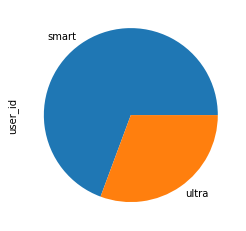

In [63]:
 df_all.groupby('tariff')['user_id'].count().plot(kind='pie');

Две трети клиентов выборки используют тариф «Смарт».

### Гистограммы по звонкам, сообщениям и интернет-трафику

Сделаю выборки из таблицы **`df_all`** в зависимости от тарифа и сохраню в отдельные переменные.

In [64]:
# выборка по типам тарифа
month_smart = df_all.query('tariff == "smart"')
month_ultra = df_all.query('tariff == "ultra"')

На основе выборок **`month_smart`** и **`month_ultra`** построю гистограммы с использованием минут, сообщений и интернет-трафика пользователями отдельно по каждому тарифу.

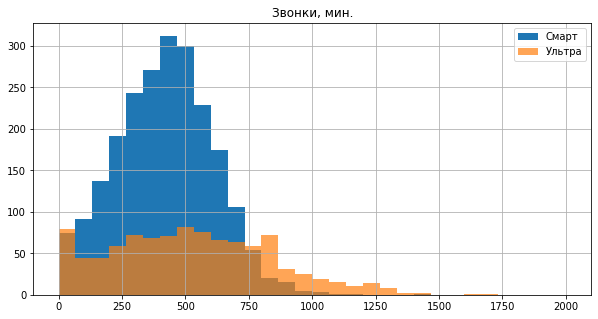

In [65]:
# построение гистограмм по продолжительности звонков в месяц в среднем
ax = month_smart['calls_sum'].hist(
    bins=30, 
    range = (0,2000), 
    figsize = (10, 5)
) 
plt.ticklabel_format(style = 'plain')
ax = month_ultra['calls_sum'].hist(
    bins=30, range = (0,2000), 
    figsize = (10, 5), 
    alpha=0.7
) 
plt.ticklabel_format(style = 'plain')
plt.title('Звонки, мин.')
ax.legend(['Смарт', 'Ультра']);

В ежемесячную плату тарифа "Смарт" входит 500 мин.разговора, тарифа "Ультра" - 3000 мин.разговора.   
На полученной гистограмме отчетливо наблюдается, что пользователям тарифа "Смарт" достаточно часто не хватает 500 мин., порядка 1/4 часть клиентов доплачивает за использованные дополнительные минуты. Основная часть пользователей тарифа "Смарт" тратит на разговоры от 100 до 700 мин. в месяц.   
Все пользователи тарифа "Ультра" укладываются в отведенный лимит с большим запасом. Основаная часть клиентов тратит на разговоры от 200 до 850 мин.  

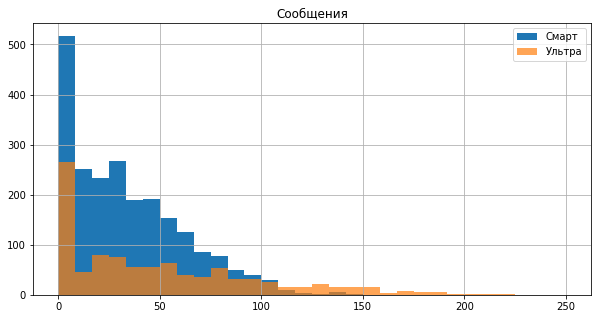

In [66]:
# построение гистограмм по количеству сообщений в месяц в среднем
ax = month_smart['messages_count'].hist(
    bins=30, 
    range = (0,250), 
    figsize = (10, 5)
) # построение гистограммы
plt.ticklabel_format(style = 'plain')
ax = month_ultra['messages_count'].hist(
    bins=30, 
    range = (0,250), 
    figsize = (10, 5), 
    alpha=0.7
) # построение гистограммы
plt.ticklabel_format(style = 'plain')
plt.title('Сообщения')
ax.legend(['Смарт', 'Ультра']);

В ежемесячную плату тарифа "Смарт" входит 50 сообщений, тарифа "Ультра" - 1000 сообщений.  
Основная часть пользователей тарифа "Смарт" укладывается в отведенный лимит, однако порядка 15-20% клиентов все же превышают его. Многие из них отправляют от 50 до 100 сообщений в месяц, есть и те, кто отправляет более 100 сообщений.  
Все пользователи тарифа "Ультра" укладываются в отведенный лимит с большим запасом. Основная часть клиентов отправляет до 100 сообщений в месяц.
Заметная часть клиентов обоих тарифов не пользуется сервисом отправки сообщений совсем.  Можно предположить, что эти клиенты отдаю предпочтение другим мессенджерам.

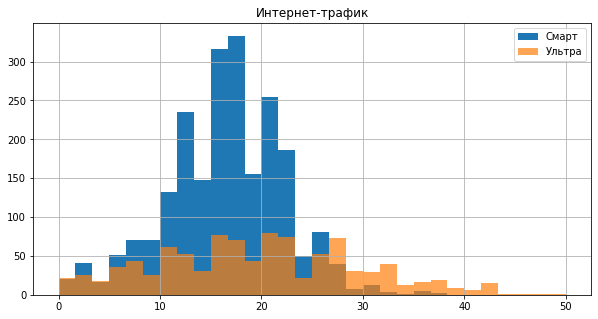

In [67]:
# построение гистограмм по использованному интернет-трафику в месяц в среднем
ax = month_smart['gb_used'].hist(
    bins=30,
    range = (0,50),
    figsize = (10, 5),
    label='Смарт'
) 
plt.ticklabel_format(style = 'plain')
ax = month_ultra['gb_used'].hist(
    bins=30, 
    range = (0,50), 
    figsize = (10, 5),
    label='Ультра', 
    alpha=0.7
) 
plt.ticklabel_format(style = 'plain')
plt.title('Интернет-трафик')
ax.legend(['Смарт', 'Ультра']);

В ежемесячную плату тарифа "Смарт" входит 15 Гб интернет-трафика, тарифа "Ультра" - 30 Гб интернет-трафика.  
Более половины пользователей тарифа "Смарт" превышают отведенный лимит.
Основная часть пользователей тарифа "Ультра" укладывается в отведенный лимит, но есть и те, кто расходует более 30 Гб и даже чуть более 40 Гб трафика.  

**Выводы**

Построены гистограммы по звонкам, сообщениям и интернет-трафику по каждому тарифу.  

- четверть пользователей тарифа "Смарт" выходит за рамки отведенного лимита минут в месяц, примерно пятая часть не укладывается в лимит сообщений
- все пользователи тарифа "Ультра" укладываются в отведенный лимит по звонкам и соообщениям с большим запасом
- более половины пользователей тарифа "Смарт" превышают отведенный лимит по интернет-трафику
- основная часть пользователей тарифа "Ультра" укладывается в отведенный лимит по интернет-трафику

### Диаграммы размаха по звонкам, сообщениям и интернет-трафику

In [68]:
month_smart[['calls_sum', 'messages_count', 'gb_used']].describe()

,calls_sum,messages_count,gb_used
count,"2,230","2,230","2,230"
mean,418,33,16
std,190,28,6
min,0,0,0
25%,282,10,13
50%,422,28,17
75%,545,51,20
max,"1,435",143,38


In [69]:
month_ultra[['calls_sum', 'messages_count', 'gb_used']].describe()

,calls_sum,messages_count,gb_used
count,986,986,986
mean,526,49,19
std,318,48,10
min,0,0,0
25%,282,6,12
50%,518,38,19
75%,752,79,27
max,"1,673",224,49


Для просмотра распределения и наличия выбросов/редких значений построю диаграммы размаха ("ящик с усами") по продолжительности звонков, количеству сообщений и объему интернет-трафика для каждого тарифа.

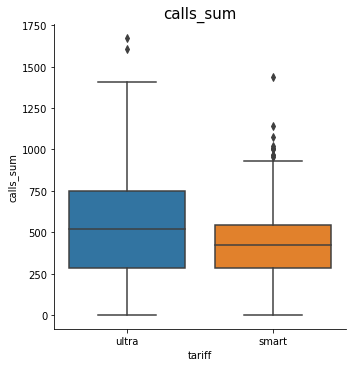

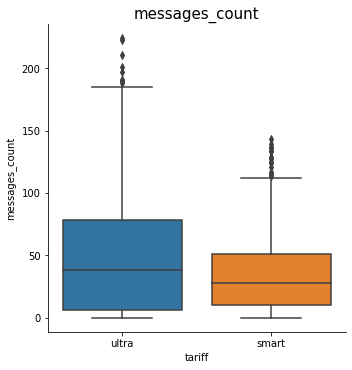

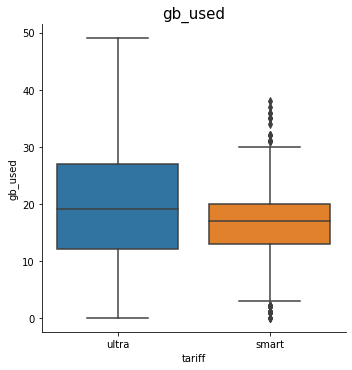

In [70]:
# создание диаграмм размаха по трем значениям
for column in ['calls_sum', 'messages_count', 'gb_used']:
    sns.catplot(x='tariff', y=column, data=df_all, kind='box')
    plt.title(column, fontsize=15)

- медианные значения всех трех параметров (звонки, сообщения, трафик) по тарифу "Ультра" выше медианных значений тарифа "Смарт"
- распределение по звонкам и интернет-трафику в обоих тарифах приближено к нормальному
- распределение по сообщениям в обоих тарифах очень сильно скошено в бОльшую сторону, расстояние между первым квартилем и медианой значительно меньше, чем расстояние между медианой и третьим квартилем
- интернет-трафик в тарифе "Ультра" не содержит выбросов
- интернет-трафик в тарифе "Смарт" содержит выбросы как низких, так и высоких значений
- по остальным параметрам в обоих тарифах наблюдаются выбросы высоких значений.  

**Выводы**

Построены диаграммы размаха по продолжительности звонков, количеству сообщений и объему интернет-трафика для каждого тарифа

- распределение по звонкам и интернет-трафику в обоих тарифах приближено к нормальному
- распределение по сообщениям в обоих тарифах очень сильно скошено в бОльшую сторону
- интернет-трафик в тарифе "Ультра" не содержит выбросов
- по остальным параметрам в обоих тарифах наблюдаются выбросы

### Статистические данные

Составлю сводную таблицу для каждого тарифа с суммой, средним, медианой, дисперсией и стандартным отклонением по звонкам, сообщениям и интернет-трафику.

In [71]:
# создание сводной таблицы 
stat = df_all.pivot_table(
    index = 'tariff', 
    values = ('calls_sum', 'messages_count', 'gb_used'), 
    aggfunc = ('sum', 'mean', 'median', 'var', 'std' )
)
stat

calls_sum                            gb_used                        \
            mean median std     sum     var    mean median std    sum var   
tariff                                                                      
smart        418    422 190 931,577  36,281      16     17   6 36,397  33   
ultra        526    518 318 518,724 101,052      19     19  10 19,202  97   

       messages_count                          
                 mean median std    sum   var  
tariff                                         
smart              33     28  28 74,413   797  
ultra              49     38  48 48,623 2,285

- в среднем пользователи тарифа "Ультра" расходуют больше минут разговора, сообщений и интернет-трафика, тогда как в целом за год пользователи тарифа "Смарт" использовали больше по каждому параметру в сумме. Это обусловено бОльшей долей пользователей тарифа "Смарт"
- значения среднего и медианы по звонкам и интернет-трафику в обоих тарифах приближены друг к другу, что подтвердает стремление к нормальному распределению
- значение среднего по сообщениям в обоих тарифах превышает значение медианы, что подтверждает распределение в бОльшую сторону
- стандартное отклонение по всем тарифам и всем параметрам показывает, что все значения относительно среднего в нашей выборке достаточно сильно распределены. 

**Выводы**

Составлена сводная таблица со статистическими данными по звонкам, сообщениям и интернет-трафику по каждому тарифу.

- в среднем пользователи тарифа "Ультра" расходуют больше минут разговора, сообщений и интернет-трафика, пользователи тарифа "Смарт" использовали больше по каждому параметру в сумме за год
- стандартное отклонение по всем тарифам и всем параметрам достаточно высокое

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для сравнения данных о неравенстве средних выручек сформулирую нулевую и альтернативную гипотезы. 

Нулевая гипотеза H₀:  
средняя выручка пользователей тарифа «Смарт» **не отличается** от средней выручки пользователей тарифа «Ультра».

Альтернативная гипотеза H₁:  
средняя выручка пользователей тарифа «Смарт» **отличается** от средней выручки пользователей тарифа «Ультра».

Применю *t-тест* для выборок по каждому тарифу. Поскольку указанные выборки независимы, укажу *equal_var = False*.

In [72]:
# рассчет p-критерия
results = st.ttest_ind(df_all[df_all['tariff'] == 'smart']['revenue'],\
                       df_all[df_all['tariff'] == 'ultra']['revenue'], equal_var = False)

print('p-значение: ', results.pvalue)

p-значение:  1.927011394420941e-250


Задам значение alpha = .05

In [73]:
# сравнение p-значения со значением alpha
alpha = .05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Полученное p-значение говорит о том, что вероятность получить случайно найденное или еще более экстремальное различие средней выручки между тарифами при условии, что нулевая гипотеза верна, крайне мала (стремится к нулю).  
Выбранный критерий значимости не был превышен. Следовательно, делаю вывод о том, что нулевую гипотезу можно отвергнуть.  

Проверю, какой тариф приносит бОльшую выручку оператору. Для этого рассчитаю среднее значение выручки по каждому тарифу.

In [74]:
# создание сводной таблицы
revenue = df_all.pivot_table(
    index = 'tariff', 
    values = 'revenue', 
    aggfunc = 'mean'
)
revenue

,revenue
tariff,
smart,"1,290"
ultra,"2,070"


Более выгодным для оператора является тариф "Ультра", несмотря на то, что пользователей этого тарифа значительно меньше. Достаточно высокий уровень ежемесячной платы по сравнению с тарифом "Смарт" позволил серьезно увеличить среднее значение выручки.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для сравнения данных о неравенстве средних выручек пользователей Москвы и других регионов сформулирую нулевую и альтернативную гипотезы.

Нулевая гипотеза H₀:
средняя выручка пользователей из Москвы *не отличается* от средней выручки пользователей из регионов.

Альтернативная гипотеза H₁:
средняя выручка пользователей из Москвы *отличается* от средней выручки пользователей из регионов.

Применю *t-тест* для выборок по Москве и регионам. Поскольку указанные выборки независимы, укажу equal_var = False.

In [75]:
# рассчет p-критерия
results = st.ttest_ind(df_all[df_all['region'] == 'Москва']['revenue'],\
                       df_all[df_all['region'] != 'Москва']['revenue'])

print('p-значение: ', results.pvalue)

p-значение:  0.8620805649132538


Задам значение alpha = .05

In [76]:
# сравнение p-значения со значением alpha
alpha = .05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Полученное p-значение говорит о том, что вероятность получить случайно найденное или еще более экстремальное различие средней выручки между Москвой и регионами при условии, что нулевая гипотеза верна, высока.  
Выбранный критерий значимости сильно превышен. Следовательно, делаю вывод о том, данные о средней выручке в Москве и регионах не противоречат нулевой гипотезе.

**Выводы**

Проведенный t-тест позволил:

- опровергнуть нулевую гипотезу и сделать вывод о значимом различии между средней выручкой пользователей тарифов «Ультра» и «Смарт» в пользу тарифа «Ультра»

- подтвердить нулевую гипотезу об отсутствии отличия между средней выручкой пользователей в Москве и регионах

## Итоги исследования

Больше половины клиентов предпочитают тариф "Смарт" и расходуют при этом в среднем меньше минут разговора, сообщений и объема интернет-трафика, чем пользователи тарифа "Ультра".

Опровергнута нулевая гипотезу и сделан вывод о значимом различии между средней выручкой пользователей тарифов «Ультра» и «Смарт».

Подтверждена нулевая гипотеза об отсутствии отличия между средней выручкой пользователей в Москве и регионах.

Более прибыльным для продвижения выглядит тариф "Ультра" вне зависимости от региона продвижения.